# Zomato EDA 

## Dataset Information
- **Restaurant Name**: Name of the restaurant  
- **Location**: City/area of the restaurant  
- **Rating**: Customer rating (0–5)  
- **Votes**: Number of votes received  
- **Cuisine**: Type of food served

## Import Libraries
### First, we’ll import the required Python libraries.

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

## Importing The datasets

In [128]:
df = pd.read_csv("zomato.csv",encoding='latin-1')
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [129]:
df.shape

(9551, 21)

In [130]:
country_df = pd.read_excel("Country-Code.xlsx")
country_df.head(5)

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


## Merging the datasets

In [131]:
final_df = pd.merge(df,country_df , on= 'Country Code' , how = "left" )
final_df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [132]:
final_df.shape

(9551, 22)

In [133]:
final_df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


## Data Cleaning
- Let's check for missing values before proceeding.

In [134]:
final_df.isnull().sum()


Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [135]:
[i for i in final_df.columns if final_df[i].isnull().sum()>0]

['Cuisines']

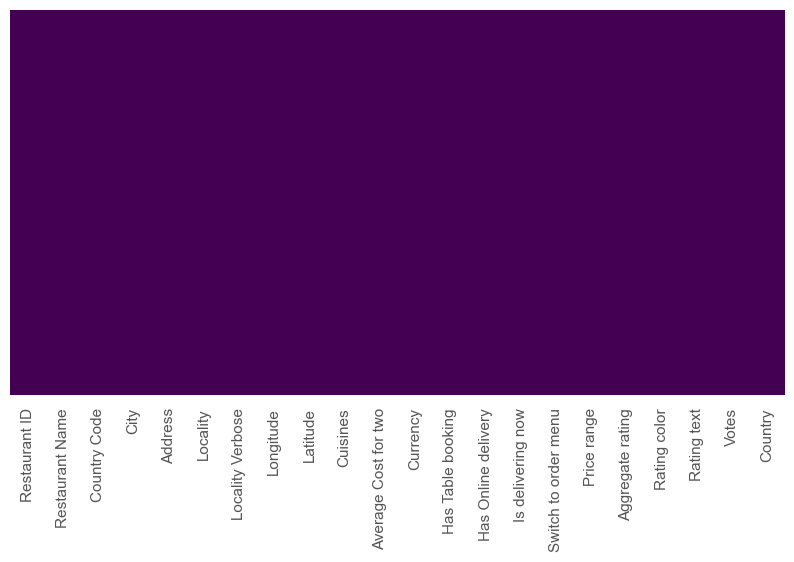

In [136]:
sns.heatmap(final_df.isnull(),yticklabels = False ,cbar = False,cmap = "viridis")
plt.show()

In [137]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

## Top countries
- The plot below shows the top 3 country which have the higest listed restaurants.

In [138]:
country_name = final_df.Country.value_counts().index
country_count = final_df.Country.value_counts().values

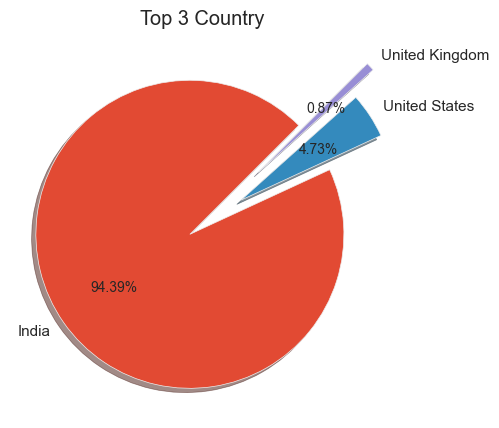

In [139]:
plt.pie(country_count[:3],
        labels = country_name[:3],
        shadow = True,
        autopct = "%1.2f%%",
        explode = [.1,.3,.5],
        startangle = 45
       )
plt.title("Top 3 Country")
plt.show()

In [140]:
rating = final_df.groupby(['Aggregate rating', 'Rating color', 'Rating text'])\
                .size().reset_index().rename(columns = {0:"count"})
rating.head()

,Aggregate rating,Rating color,Rating text,count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15


### Distribution of Ratings
- Let's see how customer ratings are distributed.

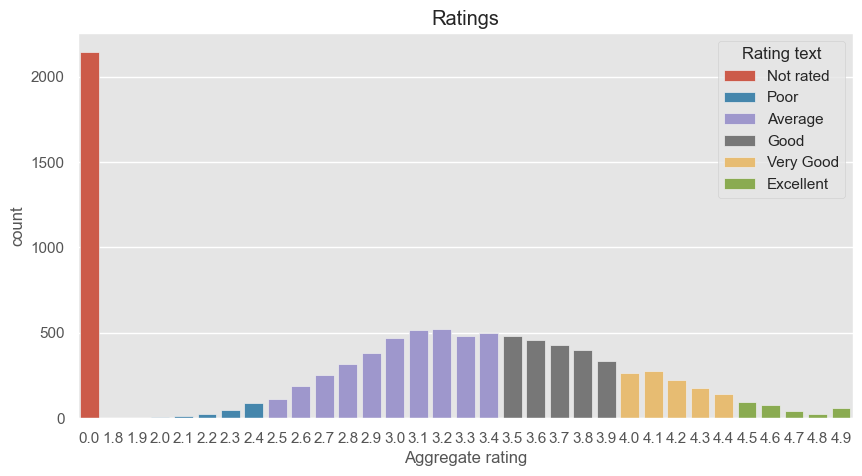

In [141]:
plt.rcParams["figure.figsize"] = (10,5)
ax = sns.barplot(data = rating, 
            x="Aggregate rating",
            y = "count", 
            hue="Rating text",
            )
ax.set_title('Ratings')
plt.show()

In [142]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [143]:
zero_rating = final_df[final_df['Aggregate rating'] == 0.0]\
                .groupby("Country").size().reset_index().rename(columns = {0:"count"})
zero_rating

,Country,count
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


In [144]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

### Countries with online delevery option

In [145]:
final_df[final_df["Has Online delivery"] == "Yes"].Country.value_counts()

Country
India    2423
UAE        28
Name: count, dtype: int64

In [146]:
final_df[["Has Online delivery","Country"]].groupby(["Has Online delivery","Country"])\
                                            .size().reset_index().tail()

,Has Online delivery,Country,0
12,No,UAE,32
13,No,United Kingdom,80
14,No,United States,434
15,Yes,India,2423
16,Yes,UAE,28


## Top Indian Cities
- The plot below shows the top cities in India which have the higest listed restaurants.

In [147]:
final_df.City.value_counts()

City
New Delhi         5473
Gurgaon           1118
Noida             1080
Faridabad          251
Ghaziabad           25
                  ... 
Lakes Entrance       1
Mohali               1
Panchkula            1
Bandung              1
Randburg             1
Name: count, Length: 141, dtype: int64

In [148]:
city_name = final_df.City.value_counts().index
city_count = final_df.City.value_counts().values

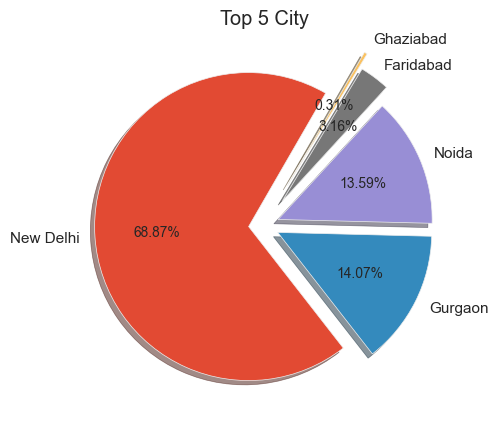

In [149]:

plt.pie(x =city_count[:5], 
        labels = city_name[:5],
        shadow = True,
        autopct = "%1.2f%%",
        explode = [.1,.1,.1,.2,.3],
        startangle = 60 )
plt.title("Top 5 City")
plt.show()

In [150]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

## Popular Cuisine
- The plot below shows which cuisines have higher order ratings

In [151]:
india_df = final_df[final_df['Country']== 'India']
value = india_df.Cuisines.value_counts().values
name = india_df.Cuisines.value_counts().index

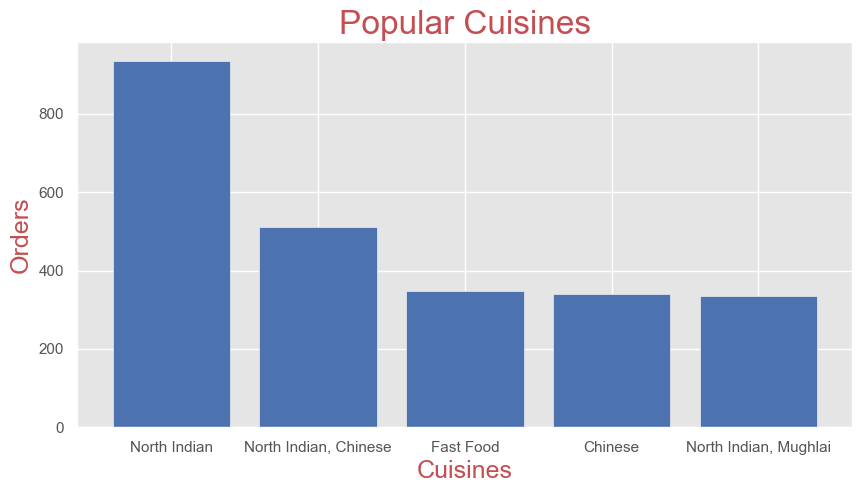

In [159]:
plt.bar( name[:5],
         value[:5],
         width = 0.8,
         color = "b")

plt.xlabel('Cuisines',fontsize=18,color= "r")
plt.ylabel('Orders',fontsize=18,color= "r")
plt.title('Popular Cuisines',fontsize=24,color= "r")
plt.show()

## Insights
- India dominates with 94% of the listed restaurants, followed by the US and UK.
- Interestingly, online delivery is available only in India and the UAE.
- North Indian cuisine is the most popular.